# Statistics of the DFA Factors

In [1]:
import numpy as np
import pandas as pd
pd.options.display.float_format = "{:,.4f}".format

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

from scipy import stats

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

### This uses factor_pricing.py, which you do not have.
### Thus, this notebook is just for demonstration.

In [3]:
import sys
sys.path.insert(0, '../cmds')
sys.path.insert(0, '../DEV')
from portfolio import *
from factor_pricing import *

# Load Data

In [4]:
filepath_data = '../data/dfa_analysis_data.xlsx'
info = pd.read_excel(filepath_data,sheet_name='descriptions')
info.rename(columns={'Unnamed: 0':'Symbol'},inplace=True)
info.set_index('Symbol',inplace=True)

facs = pd.read_excel(filepath_data,sheet_name='factors')
facs.set_index('Date',inplace=True)
rf = facs['RF'].copy()
facs.drop(columns=['RF'],inplace=True)

# 2. Factors

## 2.1

In [5]:
dts = dict()
dts['early'] = pd.date_range(start=facs.index[0], end='31/12/1980',freq='M')
dts['founding'] = pd.date_range(start='1/1/1981', end='31/12/2001',freq='M')
dts['recent'] = pd.date_range(start='1/1/2002', end=facs.index[-1],freq='M')

dts['1990s'] = pd.date_range(start='1/1/1991', end='31/12/1999',freq='M')
dts['modern'] = dts['founding'].union(dts['recent'])
dts['all'] = facs.index

/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_92294/4220933265.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dts['early'] = pd.date_range(start=facs.index[0], end='31/12/1980',freq='M')
/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_92294/4220933265.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dts['founding'] = pd.date_range(start='1/1/1981', end='31/12/2001',freq='M')
/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_92294/4220933265.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dts['recent'] = pd.date_range(start='1/1/2002', end=facs.index[-1],freq='M')
/var/folders/zx/3v_qt0957xzg3nqtnkv007d00000gn/T/ipykernel_92294/4220933265.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dts['1990s'] = pd.date_range(start='1

In [6]:
for era in dts.keys():
    print(f'\n========================================================\n')
    print(f'Period: {dts[era][0]} to {dts[era][-1]}')
    print(f'\n========================================================')
    display(performanceMetrics(facs.loc[dts[era]],annualization=12).join(tailMetrics(facs.loc[dts[era]],quantile=.05)['VaR (0.05)']))



Period: 1926-07-31 00:00:00 to 1980-12-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0810,0.2050,0.3949,-0.2874,0.3881,-0.0841
SMB,0.0339,0.1143,0.2968,-0.0989,0.3596,-0.0419
HML,0.0503,0.1342,0.3749,-0.1319,0.3552,-0.0442




Period: 1981-01-31 00:00:00 to 2001-12-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0779,0.1572,0.4953,-0.2319,0.1245,-0.0641
SMB,-0.0020,0.1173,-0.0172,-0.1741,0.2125,-0.0459
HML,0.0646,0.1099,0.5876,-0.0977,0.1224,-0.0416




Period: 2002-01-31 00:00:00 to 2025-08-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0913,0.1535,0.5947,-0.1720,0.1360,-0.0773
SMB,0.0079,0.0884,0.0897,-0.0593,0.0714,-0.0392
HML,0.0012,0.1064,0.0113,-0.1383,0.1286,-0.0415




Period: 1991-01-31 00:00:00 to 1999-12-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.1556,0.1298,1.1988,-0.1605,0.1085,-0.0416
SMB,-0.0007,0.1042,-0.0070,-0.0694,0.0848,-0.0501
HML,0.0142,0.0922,0.1539,-0.0766,0.0651,-0.0406




Period: 1981-01-31 00:00:00 to 2025-08-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0850,0.1551,0.5478,-0.2319,0.1360,-0.0723
SMB,0.0033,0.1029,0.0316,-0.1741,0.2125,-0.0418
HML,0.0310,0.1083,0.2860,-0.1383,0.1286,-0.0415




Period: 1926-07-31 00:00:00 to 2025-08-31 00:00:00



,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
Mkt-RF,0.0828,0.1841,0.4495,-0.2874,0.3881,-0.0792
SMB,0.0201,0.1093,0.1839,-0.1741,0.3596,-0.0418
HML,0.0416,0.1232,0.3377,-0.1383,0.3552,-0.0424


## 2.2
Regarding the factor premia, we see that...

* SMB premium is small in most subsamples and is negative during 1981-2001.

* HML is positive overall and in most subsamples, but it is negative in the post-case sample of 2002-2021.

* HML's premium drops substantially starting in the 1990's.

* MKT is positive in every subsample, and strongly so.

## 2.3

The correlations are low relative to most equity portfolios (which tend to have high correlations.)

* The correlation between MKT and SMB is relatively low, but definitely positive.

* The correlation between MKT and HML is negative since DFA's founding, but it was positive before that, such that the 100-year sample is positive.

(<Figure size 400x400 with 2 Axes>,
 <Axes: title={'center': 'Correlation matrix (lower triangle)'}>)

Text(0.5, 1.0, 'founding')

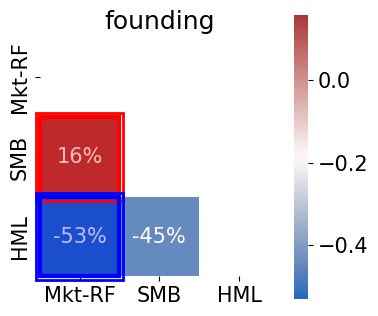

(<Figure size 400x400 with 2 Axes>,
 <Axes: title={'center': 'Correlation matrix (lower triangle)'}>)

Text(0.5, 1.0, 'recent')

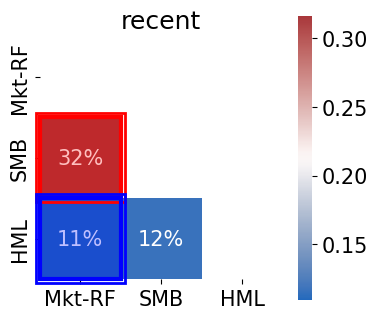

(<Figure size 400x400 with 2 Axes>,
 <Axes: title={'center': 'Correlation matrix (lower triangle)'}>)

Text(0.5, 1.0, 'modern')

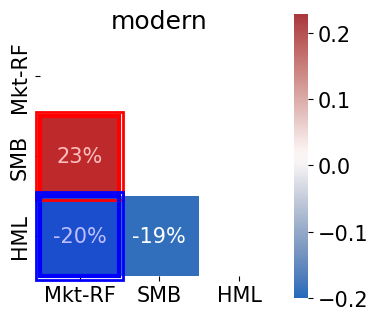

(<Figure size 400x400 with 2 Axes>,
 <Axes: title={'center': 'Correlation matrix (lower triangle)'}>)

Text(0.5, 1.0, 'all')

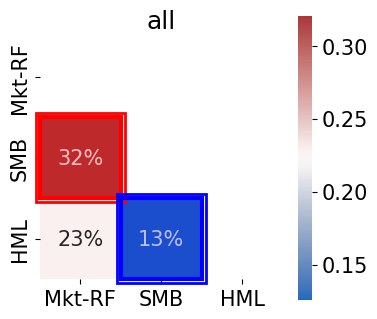

In [33]:
from cmds.plot_tools import plot_corr_matrix

for era in ['founding','recent','modern','all']:
    plot_corr_matrix(facs.loc[dts[era]],figsize=(4,4),triangle='lower');
    plt.title(era);
    plt.show()

## 2.4

<Axes: >

<Axes: >

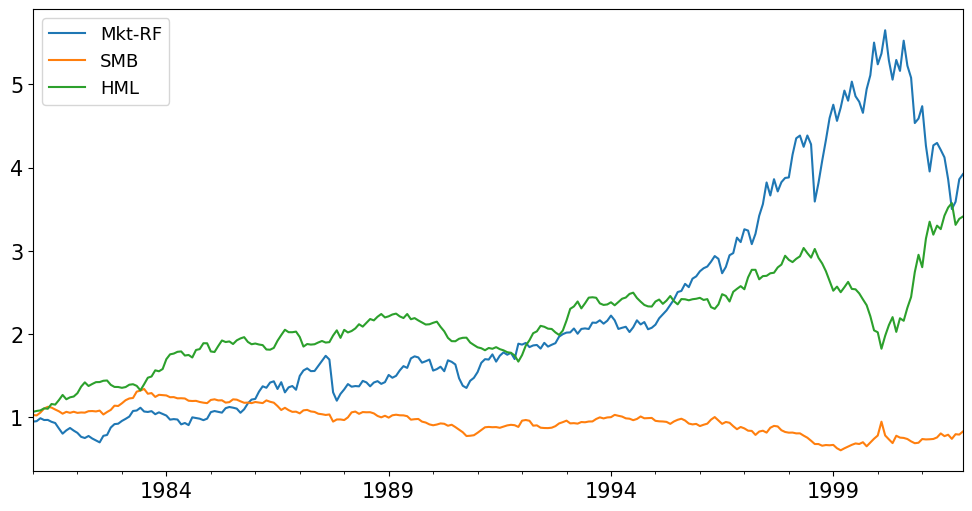

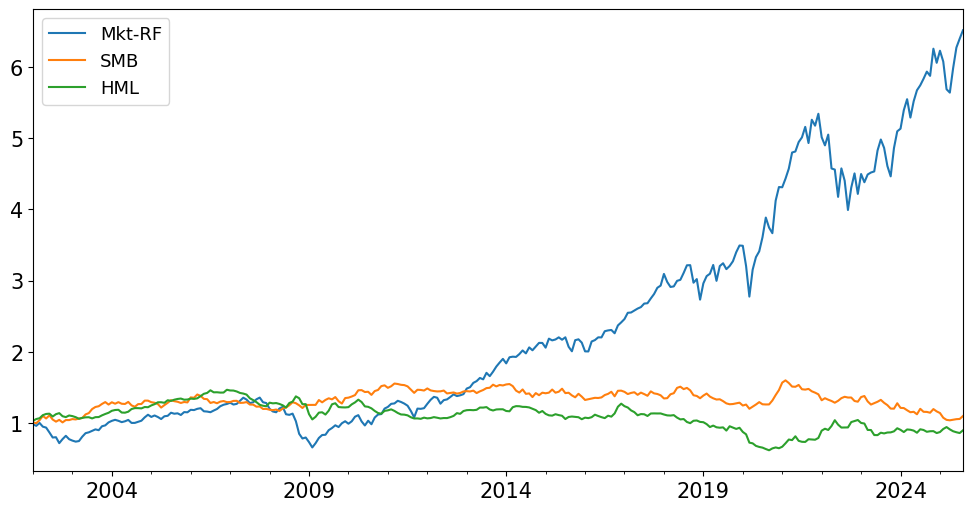

In [9]:
display((1+facs.loc[dts['founding']]).cumprod().plot());
display((1+facs.loc[dts['recent']]).cumprod().plot());

* The plots above show that HML had high returns in the era of the case: 1981-2001.

* In the post-case period (2002-2021) HML has a negative mean return. Nonetheless, it may be valuable given that it has negative correlation to MKT during this time.

* However, SMB has small or negative returns in this period while being positively correlated to MKT. Thus, it may be reasonable to drop SMB.

## Tangency Weights of Factors

Another way to consider whether all three factors matter is to remember that if a factor prices, then by the Fundamental Theorem of Asset Pricing it must be part of the tangency portfolio.

Calculate the tangency portfolio formed by the factors. Do they all get substantial weight?
We see that SMB has very little weight in the three-factor Tangency portfolio.

Thus, we again see that SMB may be unnecessary.

# 3. CAPM

## 3.1

In [10]:
# load data
rets = pd.read_excel(filepath_data,sheet_name='portfolios (total returns)')
rets.set_index('Date',inplace=True)

In [11]:
# excess portfolio returns
retsx = rets.subtract(rf,axis=0)
# subsample of modern
facsT = facs.loc[dts['modern']]
retsxT = retsx.loc[dts['modern']]

In [12]:
mets = performanceMetrics(retsxT,annualization=12)
tail = tailMetrics(retsxT)

display(mets.join(tail['VaR (0.05)']))

,Mean,Vol,Sharpe,Min,Max,VaR (0.05)
SMALL LoBM,0.0117,0.2717,0.0431,-0.3477,0.3596,-0.1249
ME1 BM2,0.0884,0.2354,0.3756,-0.3128,0.4309,-0.0949
ME1 BM3,0.0902,0.2008,0.4493,-0.2919,0.1999,-0.0848
ME1 BM4,0.1125,0.1940,0.5800,-0.2896,0.2563,-0.0776
SMALL HiBM,0.1273,0.2084,0.6110,-0.2908,0.4121,-0.0882
ME2 BM1,0.0609,0.2447,0.2490,-0.3308,0.3024,-0.1032
ME2 BM2,0.0984,0.2054,0.4790,-0.3254,0.1892,-0.0834
ME2 BM3,0.1052,0.1864,0.5640,-0.2926,0.1832,-0.0803
ME2 BM4,0.1081,0.1819,0.5942,-0.2526,0.1869,-0.0753
ME2 BM5,0.1132,0.2137,0.5298,-0.3209,0.2596,-0.0933


## Explaining premia by risk metrics

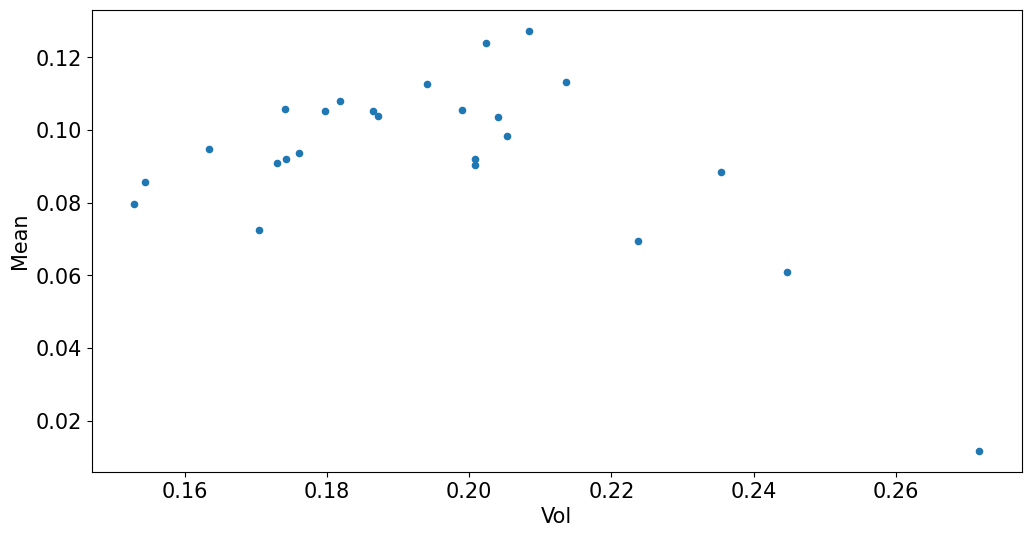

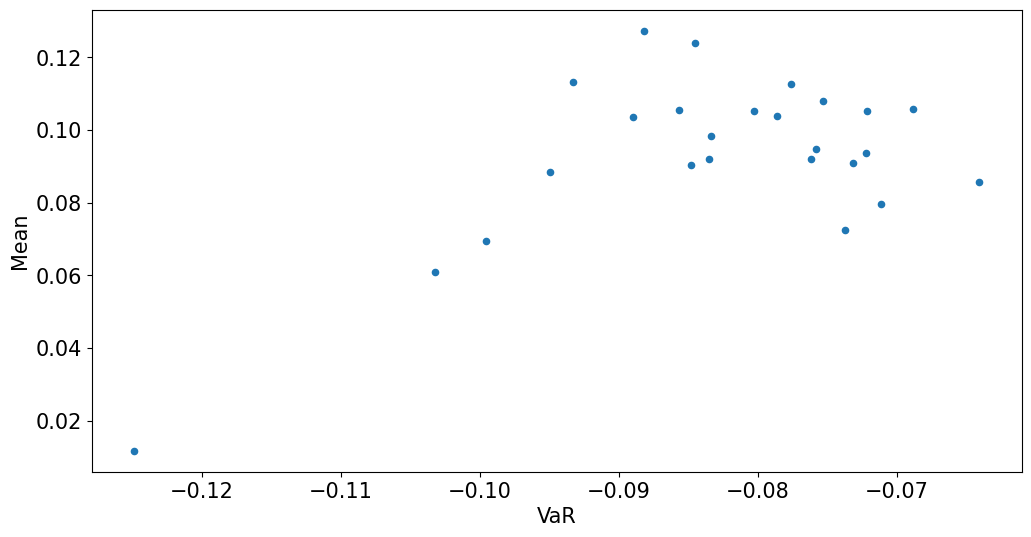

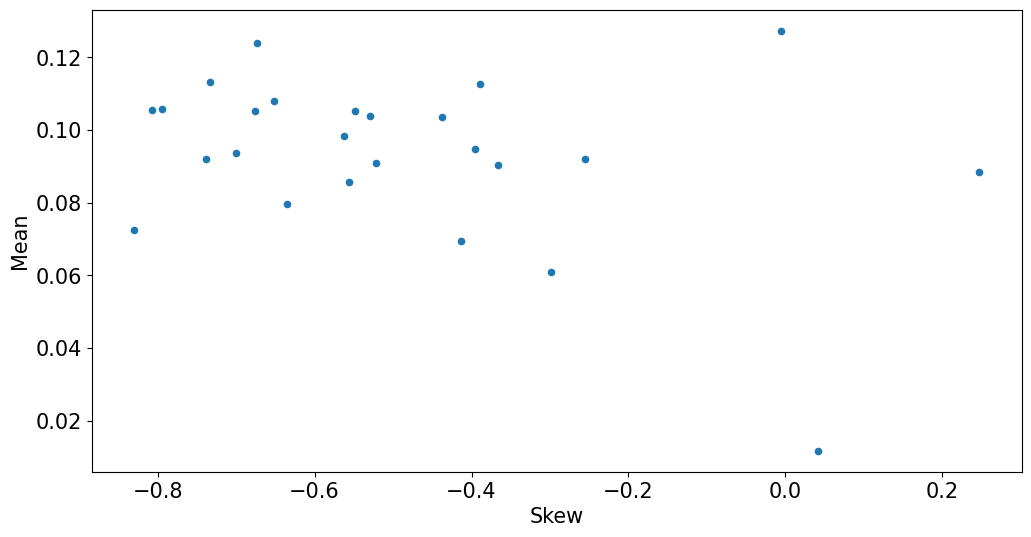

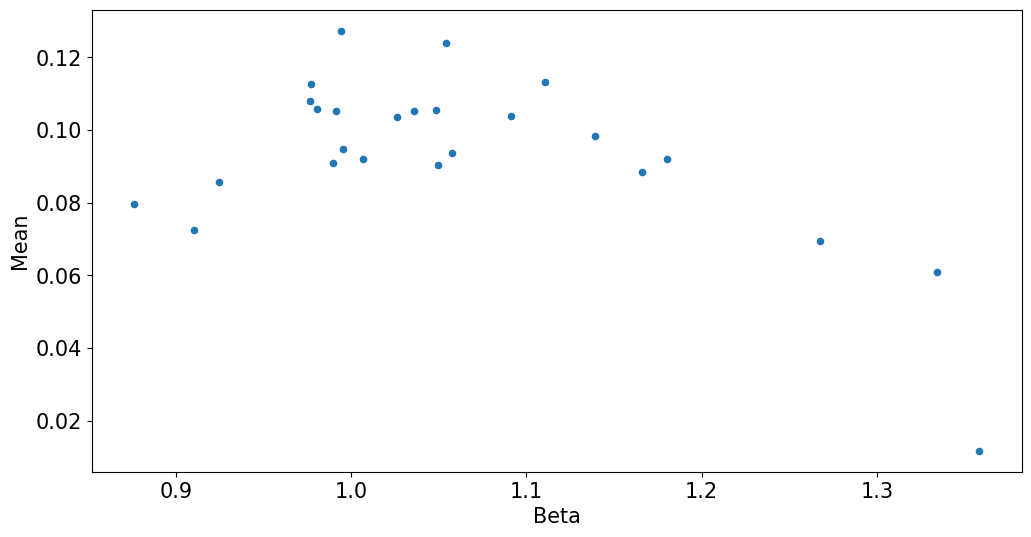

In [13]:
lfd = get_ols_metrics(facsT['Mkt-RF'],retsxT,annualization=12)

mets['Beta'] = lfd[['Mkt-RF']]
mets['VaR'] = tail[['VaR (0.05)']]
mets['Skew'] = tail[['Skewness']]

mets.plot.scatter(x='Vol',y='Mean');
mets.plot.scatter(x='VaR',y='Mean');
mets.plot.scatter(x='Skew',y='Mean');
mets.plot.scatter(x='Beta',y='Mean');

## 3.2 CAPM Tests: Time-Series Metrics

In [14]:
display(lfd)

,alpha,Mkt-RF,r-squared,Treynor Ratio,Info Ratio
SMALL LoBM,-0.1037,1.3585,0.6014,0.0086,-0.6047
ME1 BM2,-0.0106,1.1658,0.5900,0.0759,-0.0705
ME1 BM3,0.0010,1.0495,0.6571,0.0860,0.0088
ME1 BM4,0.0295,0.9773,0.6105,0.1151,0.2435
SMALL HiBM,0.0429,0.9939,0.5476,0.1281,0.3058
ME2 BM1,-0.0524,1.3341,0.7154,0.0457,-0.4018
ME2 BM2,0.0016,1.1390,0.7401,0.0864,0.0151
ME2 BM3,0.0171,1.0357,0.7426,0.1015,0.1812
ME2 BM4,0.0251,0.9765,0.6937,0.1107,0.2493
ME2 BM5,0.0188,1.1108,0.6505,0.1019,0.1488


If CAPM were true, then we would have the following implications:

* Treynor ratio would be the same for every asset, and it would equal the MKT premium.

* The alphas would all be zero

* The Information Ratios would all be zero

## 3.3 Cross-Sectional Test: Yes Intercept

Time-Series Test Plots


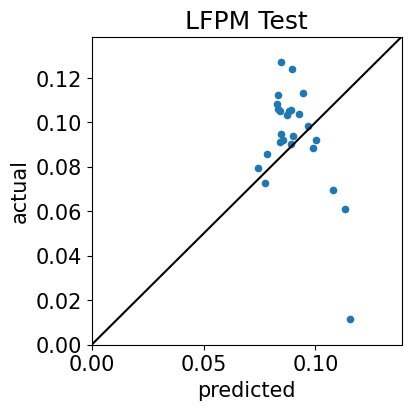

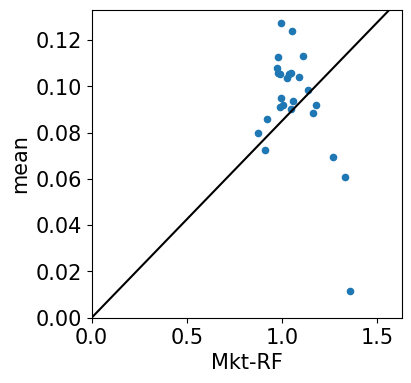

Cross-Sectional Test Plots


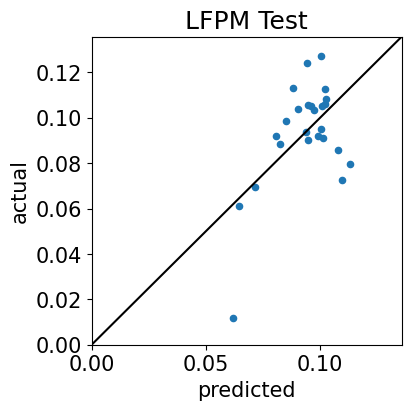

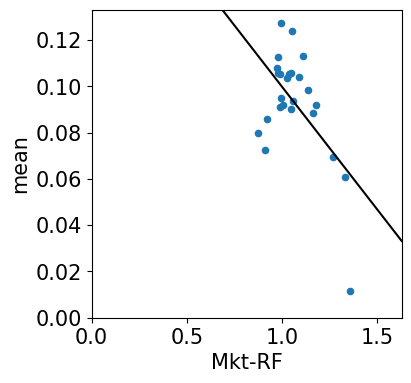


ESTIMATES


,premium-TS,premium-CS
Mkt-RF,0.0850,-0.1059
intercept,NaN,0.2058



MODEL FIT


,MAE-TS,MAE-CS,rsquared
error,0.0207,0.0141,0.3132



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
Mkt-RF,0.0003,0.0001
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [15]:
LFPtests(retsxT,facsT[['Mkt-RF']],annualization=12,useIntCS=True)

## 3.4 

These results support the idea that the MKT premium is not sufficient for explaining all premia in the market.

Given that MKT cannot explain these assets, which are sorted by size and value, it is suggestive that there may be premia in size and value. 

But while we have ruled out MKT as being the only determinant factor, we have not proven size and value matter.

# 4.1 Fama-French 3-Factor Tests
## Time-Series Test
## Cross-Sectional Test: YES Intercept

Time-Series Test Plots


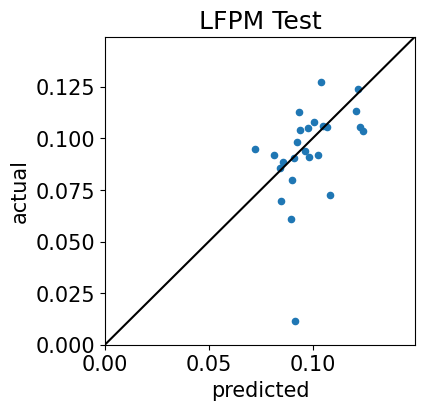

Cross-Sectional Test Plots


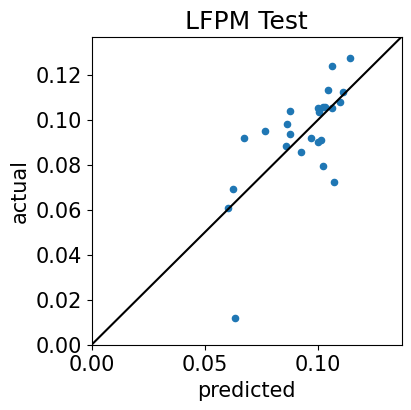


ESTIMATES


,premium-TS,premium-CS
HML,0.0310,0.0346
Mkt-RF,0.0850,-0.0937
SMB,0.0033,-0.0025
intercept,NaN,0.1800



MODEL FIT


,MAE-TS,MAE-CS,rsquared
error,0.0141,0.0114,0.4798



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
Mkt-RF,0.0001,0.0001
SMB,0.8189,0.4163
HML,0.0098,0.0282
error,0.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [16]:
LFPtests(retsxT,facsT,annualization=12,useIntCS=True)

# 4.2 Tangency Tests
## Time-Series Test
## Cross-Sectional Test: Yes Intercept

Time-Series Test Plots


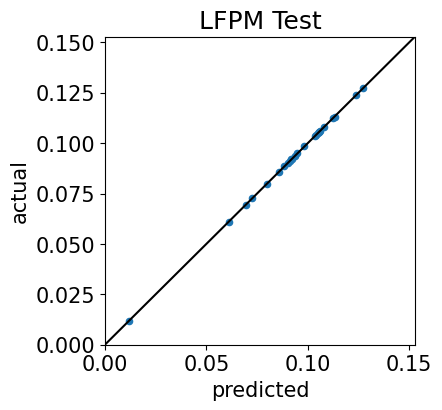

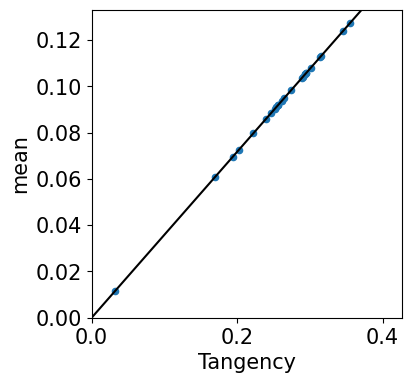

Cross-Sectional Test Plots


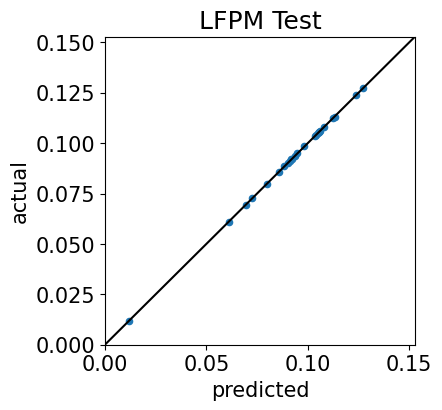

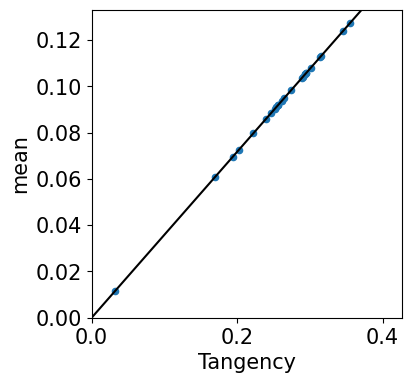


ESTIMATES


,premium-TS,premium-CS
Tangency,0.3584,0.3584
intercept,NaN,0.0000



MODEL FIT


,MAE-TS,MAE-CS,rsquared
error,0.0000,0.0000,1.0000



STATISTICAL SIGNIFICANCE


time-series,priced,premium
p-values,,
Tangency,0.0000,0.0000
error,1.0000,NaN


"premium" p-value is the usual t-stat on the time-series factor mean.
"priced" p-value of factor is the t-stat of forming the tangency portfolio.
"priced" p-value of "error" is the joint-chi-squared test of the time-series alphas


In [17]:
tangency = retsxT @ tangency_weights(retsxT)
tangency.columns= ['Tangency']

LFPtests(retsxT,tangency,annualization=12,useIntCS=True)

## 4.3 

### The MAE 
is shown in the tables above labeled as MODEL FIT.

### Joint Test of Alphas

These test stats can be found in the tables above labeled as "STATISTICAL SIGNIFICANCE" in the "error","priced" cell of the table.

We note that the p-value for CAPM is 0 to many decimal places. 

So is the p-value for Fama-French 3 Factor.

However, the p-value for the Tangency factor is 1, meaning that its errors are certainly not significant--because they are 0 to machine precision.

### Stricter test

Checking individual alphas for significance via a t-test may rule out a model.

But checking a group of alphas for joint significance via a chi-squared test is a higher hurdle for the model. Even if no individual alpha is significant, the group may be significant. We see this in that the joint test p-values for CAPM and FF are 0 to many decimals.

### Testing the Tangency

The test statistic can be viewed as the squared Sharpe Ratio of the tangency portfolio formed by alphas compared to the squared Sharpe Ratio of the model tangency portfolio (formed via the factors).